## **Project** **Title** - **PREDICT** **THE** **FORESTFIRES**

### **Problem** **Statement**:

### Aim: The aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

#### This is a regression problem with clear outliers which cannot be predicted using any reasonable method. A comparision of the three methods has been done :


(a) Random Forest Regressor,


(b) Neural Network,


(c) Linear Regression

### **Data Collection:**

- The data is a CSV file

The data is acquired from the following link:
    
- https://archive.ics.uci.edu/ml/datasets/forest+fires
    
Description of the data:
    
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

FFMC (Fine Fuel Moisture Code): This index indicates the moisture content in fine surface fuels, such as litter and dry grass. It ranges from 18.7 to 96.2, where higher values represent drier fuels that can easily ignite and sustain a fire.

DMC (Duff Moisture Code): This code measures the moisture content in loosely compacted, medium-sized organic layers (duff) below the fine surface fuels. It ranges from 1.1 to 291.3, where higher values indicate drier conditions, leading to increased fire potential in this fuel layer.

DC (Drought Code): This index indicates the moisture content in deep, compact organic layers and large, decomposed fuels. It has a range of 7.9 to 860.6, with higher values representing longer-term drought conditions, contributing to larger and more intense fires.

ISI (Initial Spread Index): This represents the expected rate of fire spread based on wind speed and fine fuel moisture. It ranges from 0.0 to 56.1, where higher values indicate faster fire spread, especially under windy conditions.

##### **Importing** **required** **packages**

In [99]:
import numpy as np     #Importing numpy package
import pandas as pd    #Importing pandas package
import seaborn as sns  #Importing seaborn package
import sklearn         #Importing sklearn package
import matplotlib.pyplot as plt   #Importing matplotlib package
%matplotlib inline

##### **Reading** **the** **dataset**

In [100]:
data = pd.read_csv("/content/Algerian_forest_fires.csv")    #Reading the dataset from drive
data   #Displaying the dataframe

,X,Y,month,day,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,Unnamed: 12,area
0,7,5,mar,fri,29,57,18,0.0,65.7,3.4,7.6,1.3,NaN,0.36
1,7,4,oct,tue,29,61,13,1.3,64.4,4.1,7.6,1.0,NaN,0.43
2,7,4,oct,sat,26,82,22,13.1,47.1,2.5,7.1,0.3,NaN,0.47
3,8,6,mar,fri,25,89,13,2.5,28.6,1.3,6.9,0.0,NaN,0.55
4,8,6,mar,sun,27,77,16,0.0,64.8,3.0,14.2,1.2,NaN,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3,4,mar,sat,31,54,11,0.0,82.0,6.0,16.3,2.5,NaN,0.00
118,3,4,mar,mon,31,66,11,0.0,85.7,8.3,24.9,4.0,NaN,8.02
119,3,4,aug,thu,32,47,14,0.7,77.5,7.1,8.8,1.8,NaN,0.68
120,3,4,aug,mon,26,80,16,1.8,47.4,2.9,7.7,0.3,NaN,0.00


In [101]:
data.shape   #To display the shape of dataframe--> no of rows and columns

(122, 14)

In [102]:
data.columns   #Displaying the column names

Index(['X', 'Y', 'month', 'day', 'temp', ' RH', ' Wind', 'rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'Unnamed: 12', 'area'],
      dtype='object')

In [103]:
print(len(data.select_dtypes(include=['object']).columns))    #Displaying no of categorical columns
print(len(data.select_dtypes(include=['int64','float64']).columns))    #Displaying no of numerical columns
print(len(data.select_dtypes(include=['bool']).columns))      #Displaying boolean columns

2
12
0


In [104]:
data.dtypes   #Displaying datatypes of each column

,0
X,int64
Y,int64
month,object
day,object
temp,int64
RH,int64
Wind,int64
rain,float64
FFMC,float64
DMC,float64


In [105]:
data.info()     #Displaying info about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            122 non-null    int64  
 1   Y            122 non-null    int64  
 2   month        122 non-null    object 
 3   day          122 non-null    object 
 4   temp         122 non-null    int64  
 5    RH          122 non-null    int64  
 6    Wind        122 non-null    int64  
 7   rain         122 non-null    float64
 8   FFMC         122 non-null    float64
 9   DMC          122 non-null    float64
 10  DC           122 non-null    float64
 11  ISI          122 non-null    float64
 12  Unnamed: 12  0 non-null      float64
 13  area         122 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 13.5+ KB


In [106]:
data.isnull().sum()   ### checking null values

,0
X,0
Y,0
month,0
day,0
temp,0
RH,0
Wind,0
rain,0
FFMC,0
DMC,0


In [107]:
data.duplicated()     # Checking duplicated values

,0
0,False
1,False
2,False
3,False
4,False
...,...
117,False
118,False
119,False
120,False


In [108]:
data.nunique()   ### checking unique values

,0
X,9
Y,6
month,9
day,7
temp,15
RH,39
Wind,13
rain,25
FFMC,101
DMC,94


In [109]:
data.describe()      #Description of the dataframe

,X,Y,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,Unnamed: 12,area
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,0.0,122.000000
mean,4.491803,3.959016,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,NaN,28.282623
std,2.201599,1.375089,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,NaN,104.283322
min,1.000000,2.000000,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,NaN,0.000000
25%,3.000000,3.000000,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,NaN,1.460000
50%,4.000000,4.000000,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,NaN,5.385000
75%,6.000000,5.000000,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,NaN,18.722500
max,9.000000,9.000000,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,NaN,1090.840000


In [110]:
data.describe(include=['object'])     #Description of categorical columns

,month,day
count,122,122
unique,9,7
top,sep,fri
freq,41,23


##### **Missing** **values**

In [111]:
data.isna().sum()    ### checking missing values

,0
X,0
Y,0
month,0
day,0
temp,0
RH,0
Wind,0
rain,0
FFMC,0
DMC,0


In [112]:
import missingno as msno    #Importing missingno package

<Axes: >

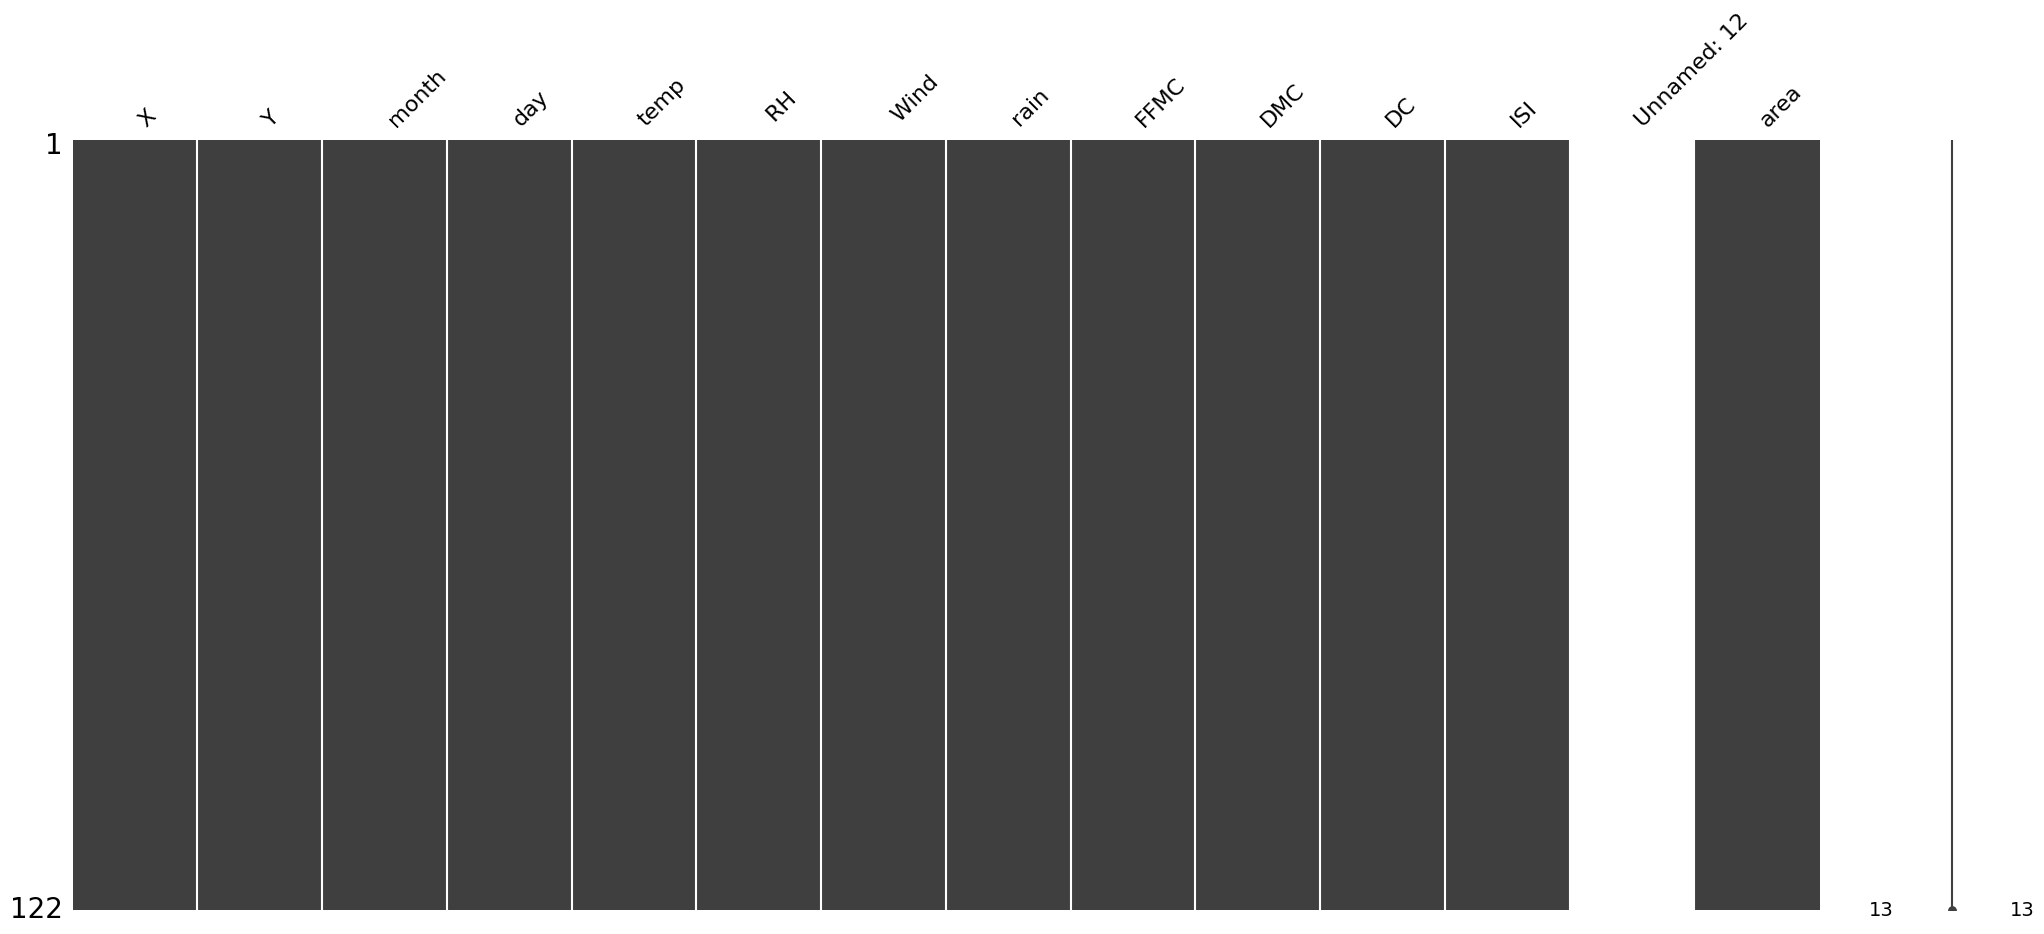

In [113]:
msno.matrix(data)       #To display missing no in a matrix

<Axes: >

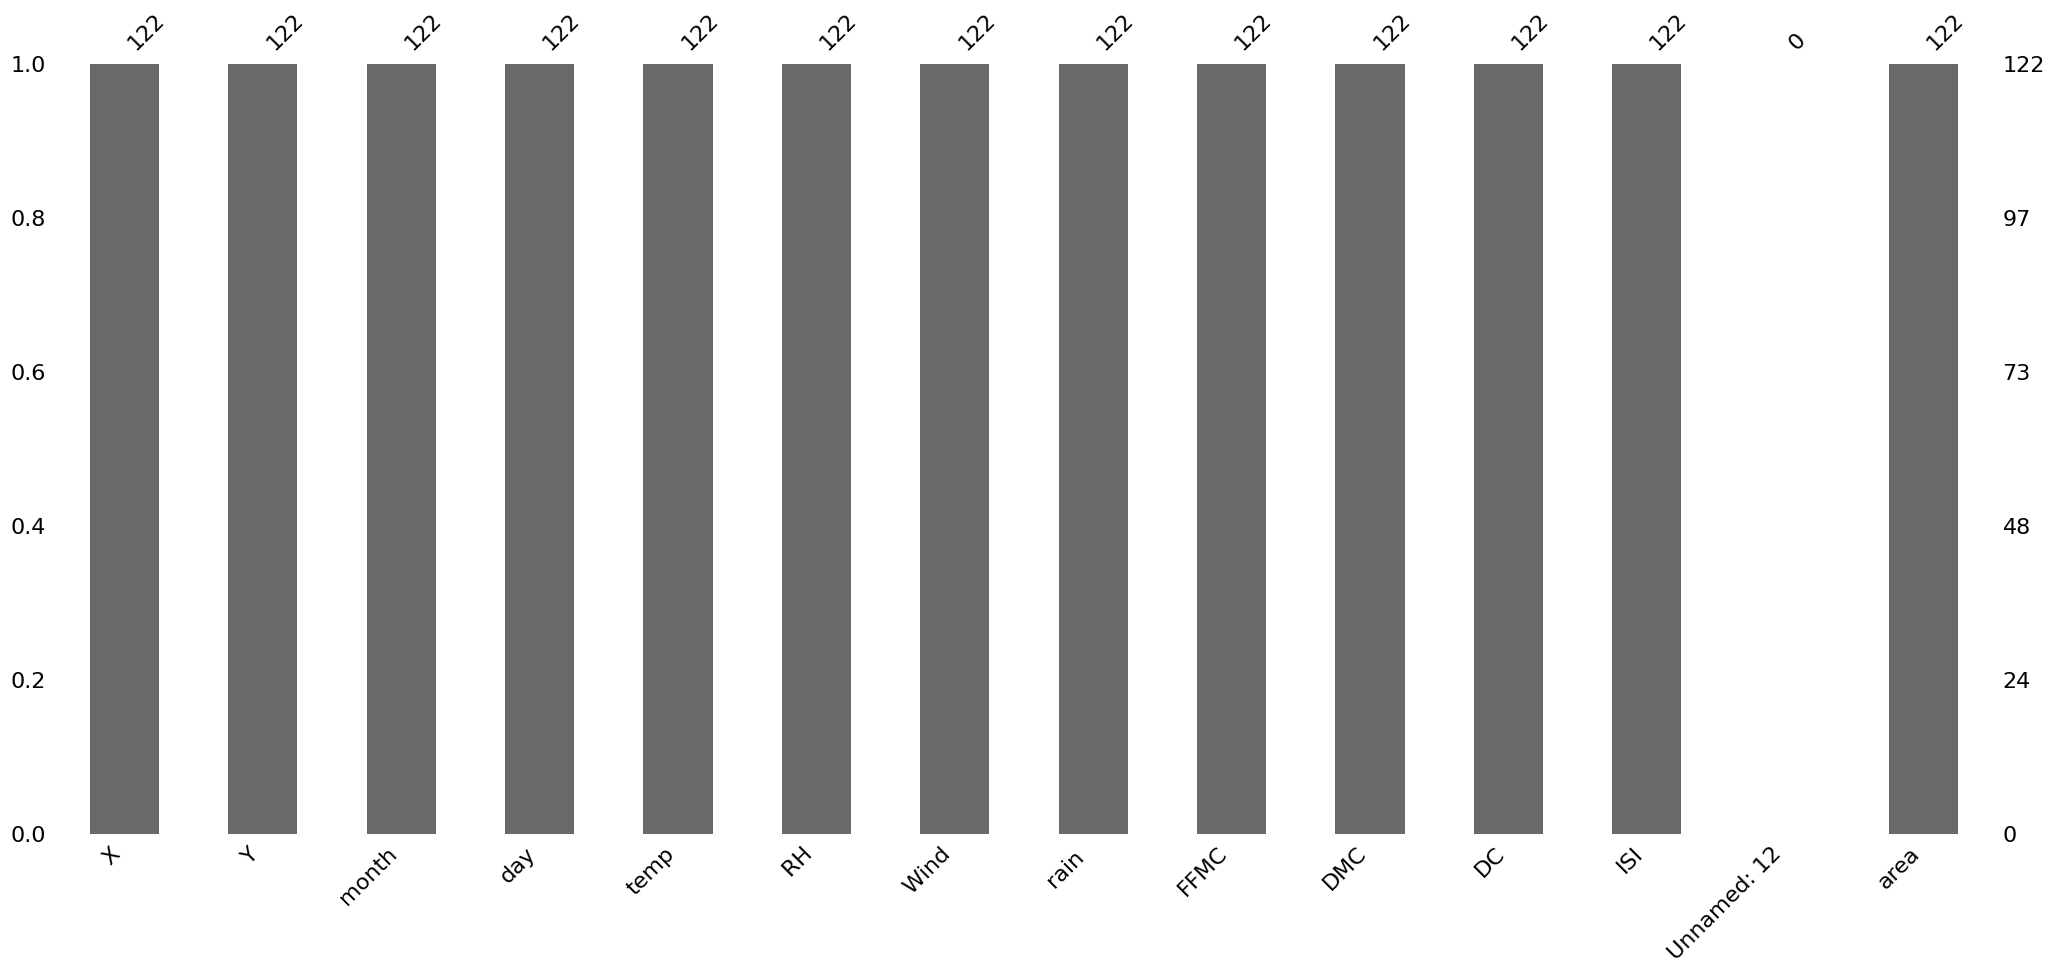

In [114]:
msno.bar(data)    #To display missing values in bar plot

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': ' RH'}>,
        <Axes: title={'center': ' Wind'}>,
        <Axes: title={'center': 'rain '}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'Unnamed: 12'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

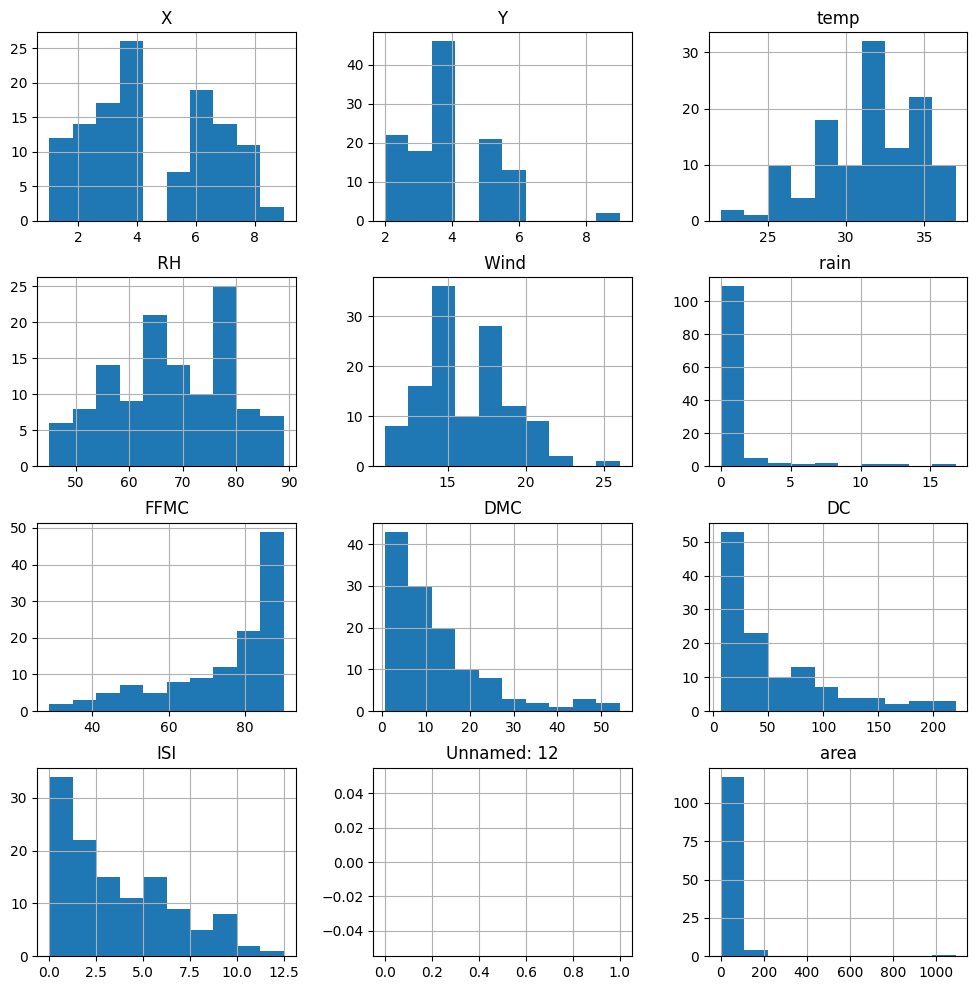

In [115]:
data.hist(figsize=(12,12))       #To display the histogram of all the columns

<Axes: >

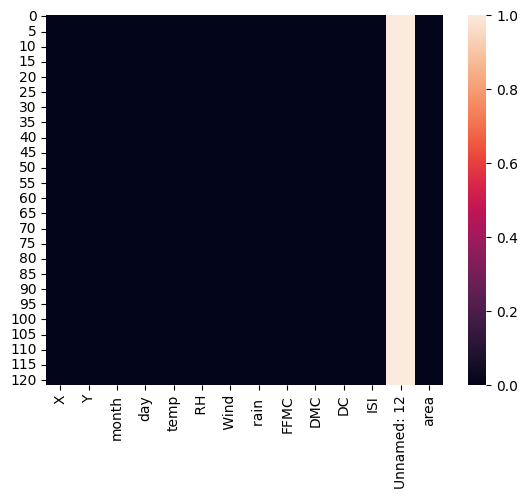

In [116]:
# Visualizing the missing values with heatmap
sns.heatmap(data.isna())

**Data Visualization**

#### Plot scatterplots and distributions of numerical features to see how they may affect the output 'area'
For this, first we need to transform the outcome 'area' by taking its logarithm (after adding 1 to avoid zeros)

$$\text{Log-area} = log_{10}(area+1)$$

In [117]:
data['Log-area']=np.log10(data['area']+1)    #To find the log of the column area

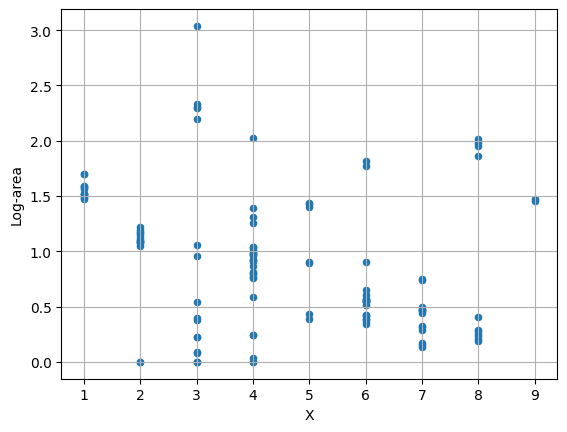

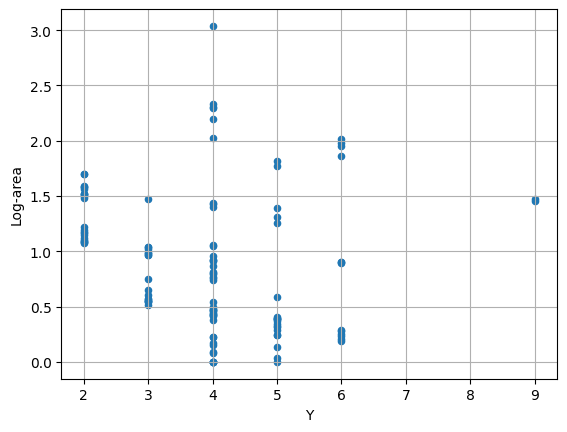

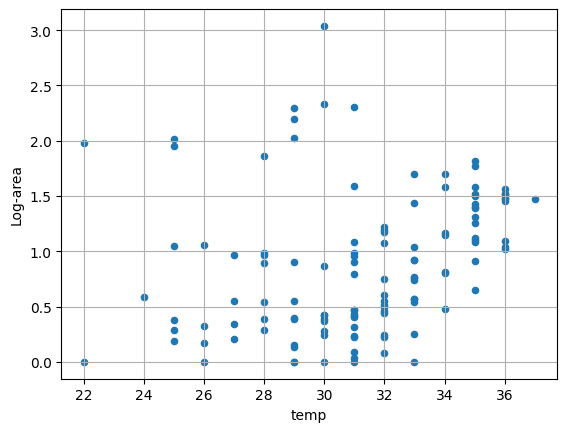

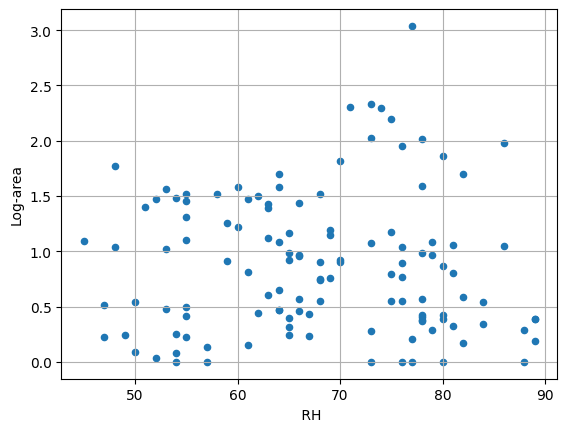

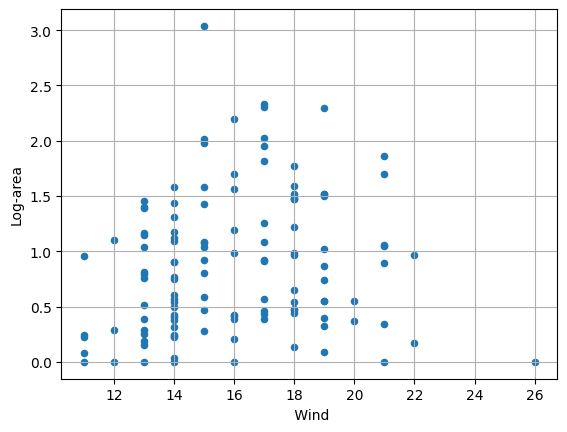

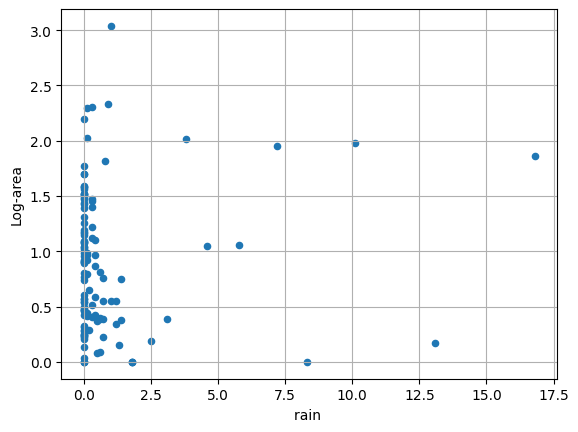

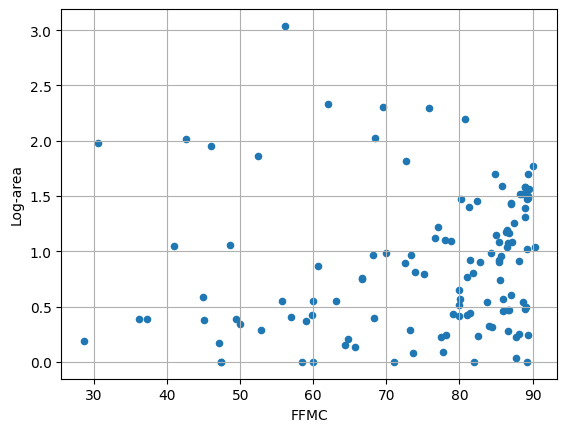

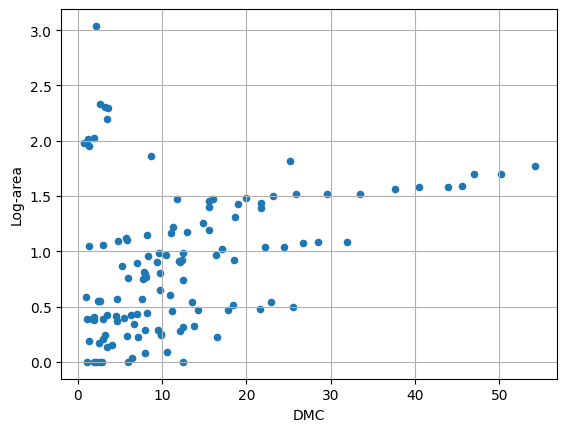

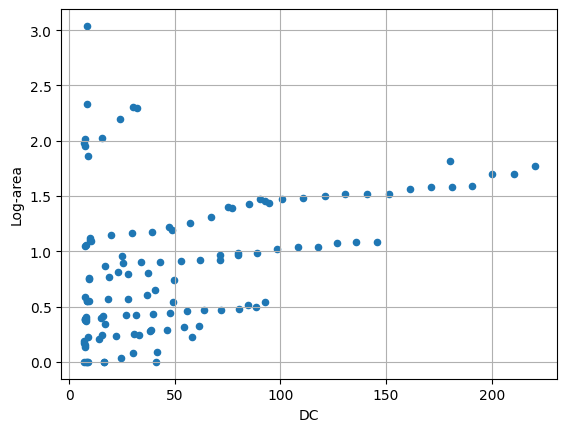

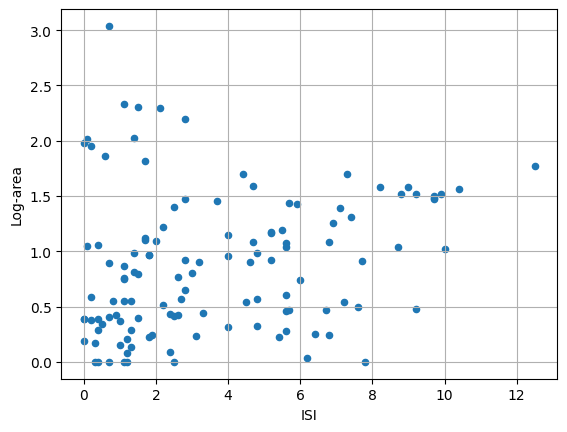

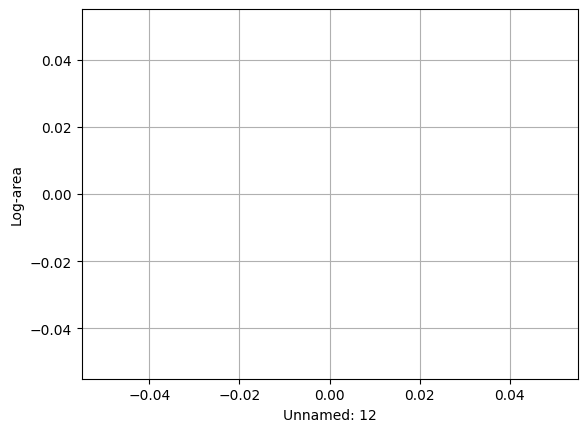

In [118]:
for i in data.describe().columns[:-2]:
    data.plot.scatter(i,'Log-area',grid=True)    #Display the scatter plot with x-axis as columns and y-axis as log area column

##### Plot boxplots of how the categorical features (month and day) affect the outcome


<Axes: title={'center': 'Log-area'}, xlabel='day'>

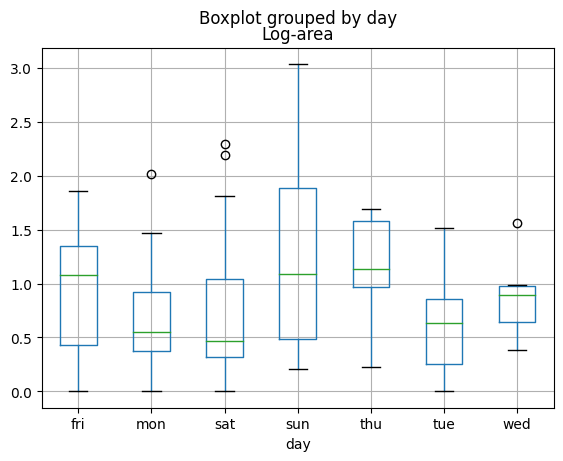

In [119]:
data.boxplot(column='Log-area',by='day')     #Boxplot which shows the how categorical column "day" affect the outcome

<Axes: title={'center': 'Log-area'}, xlabel='month'>

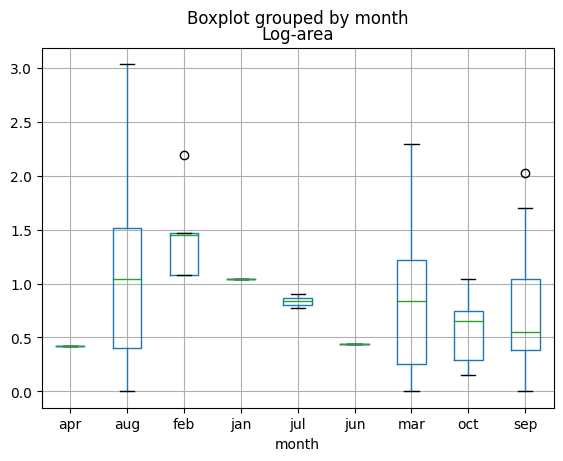

In [120]:
data.boxplot(column='Log-area',by='month')      #Boxplot which shows the how categorical column "month" affect the outcome

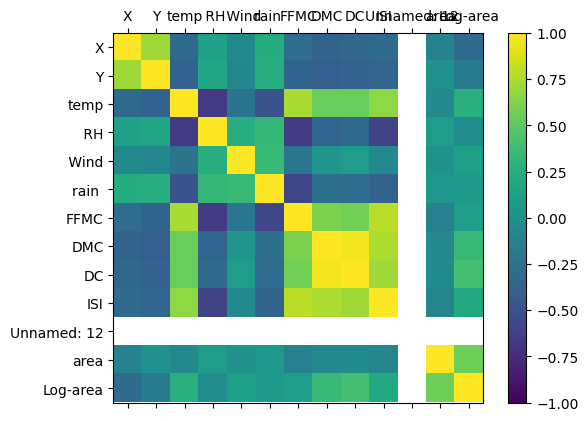

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)    ##Adding the subplot
# Calculate correlation only on numeric columns
numeric_data = data.select_dtypes(include=np.number)
cax = ax.matshow(numeric_data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)     ##Colour of the bar
ticks = np.arange(0,len(numeric_data.columns),1) # Adjust ticks for numeric columns
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_data.columns)    #Displaying name on x axis
ax.set_yticklabels(numeric_data.columns)    #Displaying name on y-axis
plt.show()

##### Encoding Categorial Data

In [122]:
data['month']    #Encoding the categorical column 'month'

,month
0,mar
1,oct
2,oct
3,mar
4,mar
...,...
117,mar
118,mar
119,aug
120,aug


In [123]:
## Coverting the categorical data into numerical columns using get_dummies
dummy_set = pd.get_dummies(data.month)
dummy_set    #Display the dummy_set

,apr,aug,feb,jan,jul,jun,mar,oct,sep
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
117,False,False,False,False,False,False,True,False,False
118,False,False,False,False,False,False,True,False,False
119,False,True,False,False,False,False,False,False,False
120,False,True,False,False,False,False,False,False,False


In [124]:
data['day']   #Encoding the categorical column 'day'

,day
0,fri
1,tue
2,sat
3,fri
4,sun
...,...
117,sat
118,mon
119,thu
120,mon


In [125]:
dummy_set1 = pd.get_dummies(data.day)   ## Coverting the categorical data into numerical columns using get_dummies
dummy_set1 #Display the dummy_set

,fri,mon,sat,sun,thu,tue,wed
0,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
117,False,False,True,False,False,False,False
118,False,True,False,False,False,False,False
119,False,False,False,False,True,False,False
120,False,True,False,False,False,False,False


In [126]:
# Concatenating the original dataframe and dataframe of dummy columns
merged_data = pd.concat([data, dummy_set, dummy_set1 ], axis=1)
merged_data    #Displaying the merged data

,X,Y,month,day,temp,RH,Wind,rain,FFMC,DMC,...,mar,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,mar,fri,29,57,18,0.0,65.7,3.4,...,True,False,False,True,False,False,False,False,False,False
1,7,4,oct,tue,29,61,13,1.3,64.4,4.1,...,False,True,False,False,False,False,False,False,True,False
2,7,4,oct,sat,26,82,22,13.1,47.1,2.5,...,False,True,False,False,False,True,False,False,False,False
3,8,6,mar,fri,25,89,13,2.5,28.6,1.3,...,True,False,False,True,False,False,False,False,False,False
4,8,6,mar,sun,27,77,16,0.0,64.8,3.0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3,4,mar,sat,31,54,11,0.0,82.0,6.0,...,True,False,False,False,False,True,False,False,False,False
118,3,4,mar,mon,31,66,11,0.0,85.7,8.3,...,True,False,False,False,True,False,False,False,False,False
119,3,4,aug,thu,32,47,14,0.7,77.5,7.1,...,False,False,False,False,False,False,False,True,False,False
120,3,4,aug,mon,26,80,16,1.8,47.4,2.9,...,False,False,False,False,True,False,False,False,False,False


In [127]:
# Creating dummy columns and dropping the dummy column
pd.get_dummies(data, columns=['month','day'], drop_first=True)

,X,Y,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,...,month_jun,month_mar,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,29,57,18,0.0,65.7,3.4,7.6,1.3,...,False,True,False,False,False,False,False,False,False,False
1,7,4,29,61,13,1.3,64.4,4.1,7.6,1.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,26,82,22,13.1,47.1,2.5,7.1,0.3,...,False,False,True,False,False,True,False,False,False,False
3,8,6,25,89,13,2.5,28.6,1.3,6.9,0.0,...,False,True,False,False,False,False,False,False,False,False
4,8,6,27,77,16,0.0,64.8,3.0,14.2,1.2,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3,4,31,54,11,0.0,82.0,6.0,16.3,2.5,...,False,True,False,False,False,True,False,False,False,False
118,3,4,31,66,11,0.0,85.7,8.3,24.9,4.0,...,False,True,False,False,True,False,False,False,False,False
119,3,4,32,47,14,0.7,77.5,7.1,8.8,1.8,...,False,False,False,False,False,False,False,True,False,False
120,3,4,26,80,16,1.8,47.4,2.9,7.7,0.3,...,False,False,False,False,True,False,False,False,False,False


##### Label encoder for the categorical feature


In [128]:
from sklearn.model_selection import train_test_split    #Importing train_test_split from sklearn model selection
from sklearn.preprocessing import OneHotEncoder         #Importing OneHotEncoder from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder          #Importing LabelEncoder from sklearn preprocessing

In [129]:
enc = LabelEncoder()
enc.fit(data['month'])    ## month column

LabelEncoder()

In [130]:
enc.classes_    #Encoding classes of month column

array(['apr', 'aug', 'feb', 'jan', 'jul', 'jun', 'mar', 'oct', 'sep'],
      dtype=object)

In [131]:
data['month_encoded']=enc.transform(data['month'])    #Transforming the encoded month column
data.head()

,X,Y,month,day,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,Unnamed: 12,area,Log-area,month_encoded
0,7,5,mar,fri,29,57,18,0.0,65.7,3.4,7.6,1.3,NaN,0.36,0.133539,6
1,7,4,oct,tue,29,61,13,1.3,64.4,4.1,7.6,1.0,NaN,0.43,0.155336,7
2,7,4,oct,sat,26,82,22,13.1,47.1,2.5,7.1,0.3,NaN,0.47,0.167317,7
3,8,6,mar,fri,25,89,13,2.5,28.6,1.3,6.9,0.0,NaN,0.55,0.190332,6
4,8,6,mar,sun,27,77,16,0.0,64.8,3.0,14.2,1.2,NaN,0.61,0.206826,6


In [132]:
enc.fit(data['day'])  ## day column

LabelEncoder()

In [133]:
enc.classes_    #Encoding classes of day column

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [134]:
data['day_encoded']=enc.transform(data['day'])     #Transforming the encoded day column
data.head(10)

,X,Y,month,day,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,Unnamed: 12,area,Log-area,month_encoded,day_encoded
0,7,5,mar,fri,29,57,18,0.0,65.7,3.4,7.6,1.3,NaN,0.36,0.133539,6,0
1,7,4,oct,tue,29,61,13,1.3,64.4,4.1,7.6,1.0,NaN,0.43,0.155336,7,5
2,7,4,oct,sat,26,82,22,13.1,47.1,2.5,7.1,0.3,NaN,0.47,0.167317,7,2
3,8,6,mar,fri,25,89,13,2.5,28.6,1.3,6.9,0.0,NaN,0.55,0.190332,6,0
4,8,6,mar,sun,27,77,16,0.0,64.8,3.0,14.2,1.2,NaN,0.61,0.206826,6,3
5,8,6,aug,sun,31,67,14,0.0,82.6,5.8,22.2,3.1,NaN,0.71,0.232996,1,3
6,8,6,aug,mon,33,54,13,0.0,88.2,9.9,30.5,6.4,NaN,0.77,0.247973,1,1
7,8,6,aug,mon,30,73,15,0.0,86.6,12.1,38.3,5.6,NaN,0.90,0.278754,1,1
8,8,6,sep,tue,25,88,13,0.2,52.9,7.9,38.8,0.4,NaN,0.95,0.290035,8,5
9,7,5,sep,sat,28,79,12,0.0,73.2,9.5,46.3,1.3,NaN,0.96,0.292256,8,2


##### Splitting the data

In [135]:
test_size=0.4    #Test size

In [136]:
X = data.drop(['area','Log-area','month','day'], axis=1)   #Splitting the dataset to X by dropping the columns area,logarea,month,day
X.head()

,X,Y,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,Unnamed: 12,month_encoded,day_encoded
0,7,5,29,57,18,0.0,65.7,3.4,7.6,1.3,NaN,6,0
1,7,4,29,61,13,1.3,64.4,4.1,7.6,1.0,NaN,7,5
2,7,4,26,82,22,13.1,47.1,2.5,7.1,0.3,NaN,7,2
3,8,6,25,89,13,2.5,28.6,1.3,6.9,0.0,NaN,6,0
4,8,6,27,77,16,0.0,64.8,3.0,14.2,1.2,NaN,6,3


In [137]:
y = data['Log-area']     #Splitting the dataset to y by dropping the columns logarea
y.head()

,Log-area
0,0.133539
1,0.155336
2,0.167317
3,0.190332
4,0.206826


In [138]:
# Preparing Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state= 156)

In [139]:
print(X_train.shape)    #To display the X_train shape
print(X_test.shape)     #To display the X_test shape
print(y_train.shape)    #To display the y_train shape
print(y_test.shape)     #To display the y_test shape
X_train     #Displaying the X_train

(73, 13)
(49, 13)
(73,)
(49,)


,X,Y,temp,RH,Wind,rain,FFMC,DMC,DC,ISI,Unnamed: 12,month_encoded,day_encoded
119,3,4,32,47,14,0.7,77.5,7.1,8.8,1.8,NaN,1,4
57,4,3,33,76,15,0.0,86.5,24.4,117.8,5.6,NaN,7,3
74,5,4,33,66,14,0.0,87.0,21.7,94.7,5.7,NaN,8,0
35,6,3,32,63,14,0.0,87.0,10.9,37.0,5.6,NaN,8,5
18,6,4,31,55,16,0.1,79.9,4.5,16.0,2.5,NaN,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2,2,35,63,14,0.3,76.6,5.7,10.0,1.7,NaN,1,3
101,3,4,33,73,12,1.8,59.9,2.2,8.9,0.7,NaN,1,5
34,6,3,33,66,14,0.0,85.9,7.6,27.9,4.8,NaN,8,1
76,9,9,36,61,18,0.3,80.2,11.7,90.4,2.8,NaN,2,0


#### Model Building:

#### Train the model

In [140]:
def rec(m,n,tol):      #Defining rec
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size       #Assigning m.size to l
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)   #Returning (100*percent/l) value

In [141]:
tol_max=20    # Assigning Maxvalue

### **RANDOM FOREST REGRESSOR**

Random Forests (RF) algorithm provides an ensemble of classiﬁcation and regression trees.
- In this project we are using Random Forest Regressor.
- By a pseudo-random variable selection for each split node, this method grows a variety of decision trees that do not return the same results.
- This algorithm incorporates directly measurement of importance variable which is used to display factors affecting forest ﬁres.
- Dealing with this param-eter, several models can be ﬁt, and thus, a prediction can be made.

In [142]:
from sklearn.ensemble import RandomForestRegressor     #Importing Random Forest Regressor package from sklearn ensemble
from sklearn.model_selection import GridSearchCV       #Importing GridSearchCV package from sklearn.model_selection

In [143]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [146]:
# Parameter grid for the Grid Search
# Original: param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# Updated with parameters relevant to RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Assuming you have your features in X and target in y
# ... (Your data loading and preprocessing code here) ...
# Define your parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a RandomForestRegressor object
rf_regressor = RandomForestRegressor()
# Create a GridSearchCV object
grid_RF = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5) # cv=5 for 5-fold cross-validation
# Fit the GridSearchCV object to your data
grid_RF.fit(X, y)  # Replace X and y with your actual data
# Now you can access the best parameters
print("Best parameters obtained by Grid Search:", grid_RF.best_params_)

Best parameters obtained by Grid Search: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [149]:
a=grid_RF.predict(X_test)     #Predicting the X_test by grid rf
rmse_rf=np.sqrt(np.mean((y_test-a)**2))     #RMSE formula
print("RMSE for Random Forest:",rmse_rf)    #Printing the Rmse value for random forest

RMSE for Random Forest: 0.35266091775534436


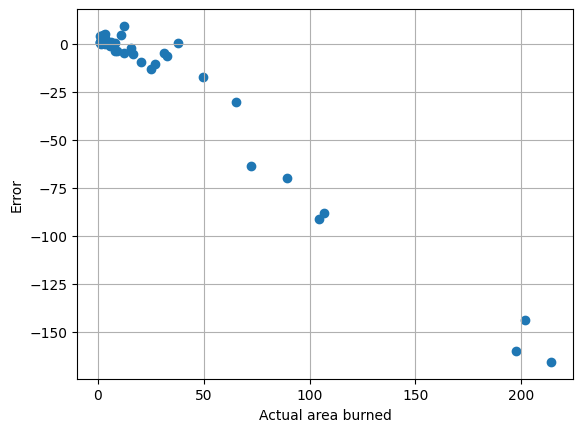

In [150]:
##Scatter plot to show actual area burned and error
plt.xlabel("Actual area burned")      # To print xlabel as actual area burned
plt.ylabel("Error")          # To print ylabel as error
plt.grid(True)     #plotting as a grid
plt.scatter(10**(y_test),10**(a)-10**(y_test))    ##plotting a Scatterplot

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  1.,  2.,  4.,  3., 24.,  5.,  1.]),
 array([-165.67146622, -162.16903234, -158.66659847, -155.16416459,
        -151.66173071, -148.15929684, -144.65686296, -141.15442908,
        -137.65199521, -134.14956133, -130.64712745, -127.14469357,
        -123.6422597 , -120.13982582, -116.63739194, -113.13495807,
        -109.63252419, -106.13009031, -102.62765644,  -99.12522256,
         -95.62278868,  -92.12035481,  -88.61792093,  -85.11548705,
         -81.61305318,  -78.1106193 ,  -74.60818542,  -71.10575155,
         -67.60331767,  -64.10088379,  -60.59844992,  -57.09601604,
         -53.59358216,  -50.09114829,  -46.58871441,  -43.08628053,
         -39.58384665,  -36.08141278,  -32.5789789 ,  -29.07654502,
         -25.57411115,  -22.07167727

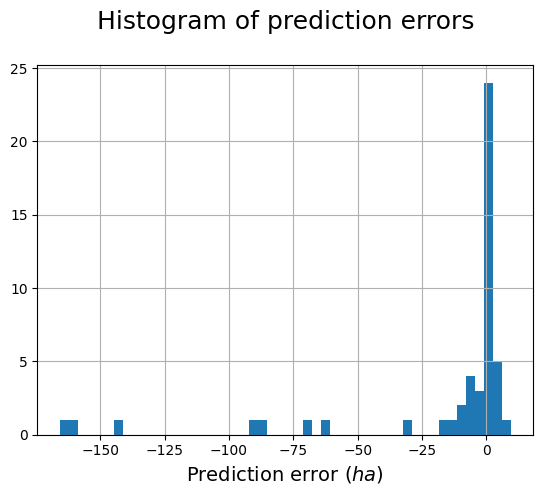

In [151]:
plt.title("Histogram of prediction errors\n",fontsize=18)     ##Title to the plot
plt.xlabel("Prediction error ($ha$)",fontsize=14)    ## xlabel as prediction error
plt.grid(True)    ##plotting as a grid
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)   ##plotting a histogram

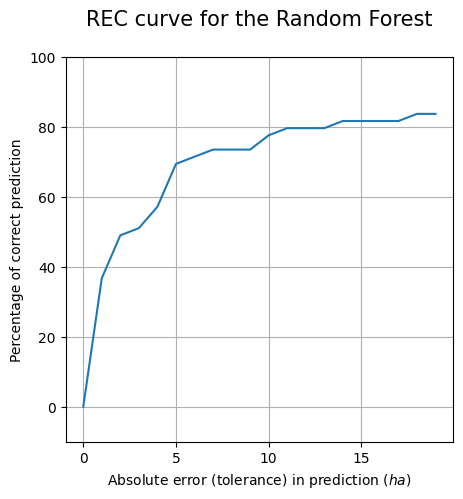

In [152]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))    #Assessing a size to the plot
plt.title("REC curve for the Random Forest\n",fontsize=15)   #title of the plot
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")   #assessing x label as absolute error
plt.ylabel("Percentage of correct prediction")   # assessing ylabel as percentage of correct prediction
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)    # giving a y limit as -10 to 100
plt.yticks([i*20 for i in range(6)])
plt.grid(True)    #plotting as a grid
plt.plot(range(tol_max),rec_RF)

### **NEURAL NETWORK**

The neural network used for this project is a multilayer perceptron whose architectural parameters, i.e., the number of hidden layers and the number of neurons per layer were heuristically determined.

Neural-networks-based approach to the problem of predicting forest ﬁres has been presented.


In [153]:
from keras.models import Sequential      #Importing sequential from keras.model
import keras.optimizers as opti          #Importing opti from keras.optimizers
from keras.layers import Dense, Activation,Dropout    #Importing Dense,Activation,Dropout from keras.layers

In [154]:
model = Sequential()   #Sequential model
model.add(Dense(100, input_dim=12))    #adding dense to the model
model.add(Activation('selu'))   #adding activation of 'selu' to the model
model.add(Dropout(0.3))   #adding dropout as 0.3 to the model
model.add(Dense(100))   #adding dense as 100 to the model
model.add(Dropout(0.3))    #Adding dropout 0.3 to the model
model.add(Activation('selu'))  #adding activation 'selu' to the model
model.add(Dense(50))    #adding dense as 50 to the model
model.add(Activation('elu'))   #adding activation 'elu' to the model
model.add(Dense(1))   #adding dense as 1 to the model
model.summary()   ##Displaying the summary of the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,501 (64.46 KB)

 Trainable params: 16,501 (64.46 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
learning_rate = 0.001  # assigning a learning rate
optimizer = opti.RMSprop(learning_rate=learning_rate)  # optimizing the learning rate
model.compile(optimizer=optimizer, loss='mse')  # compiling the model with optimizer and loss 'mse'

In [156]:
# Assuming X_train has 13 columns and you want to use all of them:
model = Sequential()
model.add(Dense(100, input_dim=13))  # Change input_dim to 13 to match X_train's shape
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,601 (64.85 KB)

 Trainable params: 16,601 (64.85 KB)

 Non-trainable params: 0 (0.00 B)

**Prediction and RMSE**

In [157]:
a=model.predict(X_test)   #predicting the model with X_test
print("RMSE for NN:",np.sqrt(np.mean((y_test-a.reshape(a.size,))**2)))    #Printing the rmse for nn model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
RMSE for NN: nan


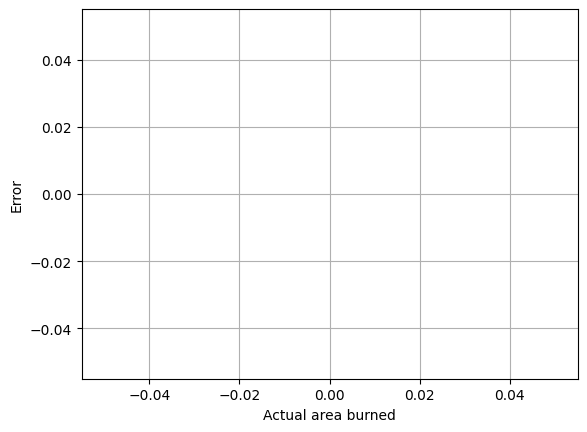

In [158]:
plt.xlabel("Actual area burned")   # To print xlabel as actual area burned
plt.ylabel("Error")    # To print ylabel as error
plt.grid(True)     #plotting as a grid
plt.scatter(10**(y_test),10**(a.reshape(a.size,))-10**(y_test))   ##Plotting a scatterplot

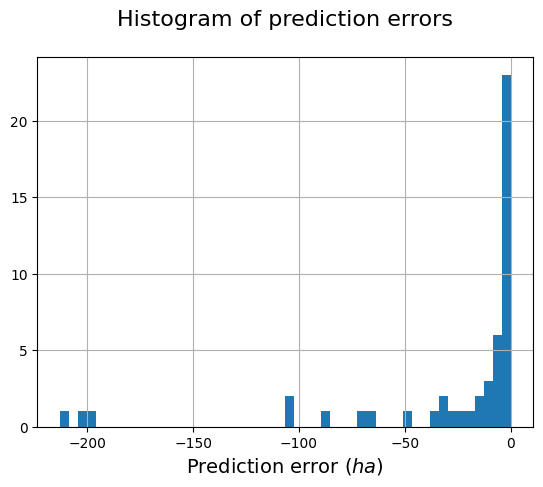

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

# ... your existing code ...

# Replace NaN values in 'a' with 0 before reshaping
a = np.nan_to_num(a)

# Calculate the difference and handle potential NaN values
diff = 10**(a.reshape(a.size,)) - 10**(y_test)
diff = diff[np.isfinite(diff)]  # Keep only finite values

# Plot the histogram with the filtered data
plt.title("Histogram of prediction errors\n",fontsize=16)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(diff, bins=50)
plt.show()

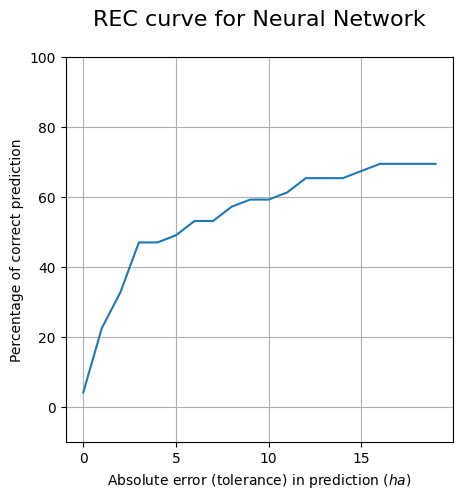

In [161]:
rec_NN=[]   #defining rec
for i in range(tol_max):
    rec_NN.append(rec(a,y_test,i))
plt.figure(figsize=(5,5))  #assigning the size to the figure
plt.title("REC curve for Neural Network\n",fontsize=16)   ##title to the rec curve with font size 16
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")   #plotting with x label as absolute error
plt.ylabel("Percentage of correct prediction")   #plotting with y label as percentahe of correct prediction
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)   #assigning a limit for y
plt.yticks([i*20 for i in range(6)])
plt.grid(True)   #plotting a grid
plt.plot(range(tol_max),rec_NN)

**Relative performance of Random Forest Regressor and Neural Networks(REC Curves)**

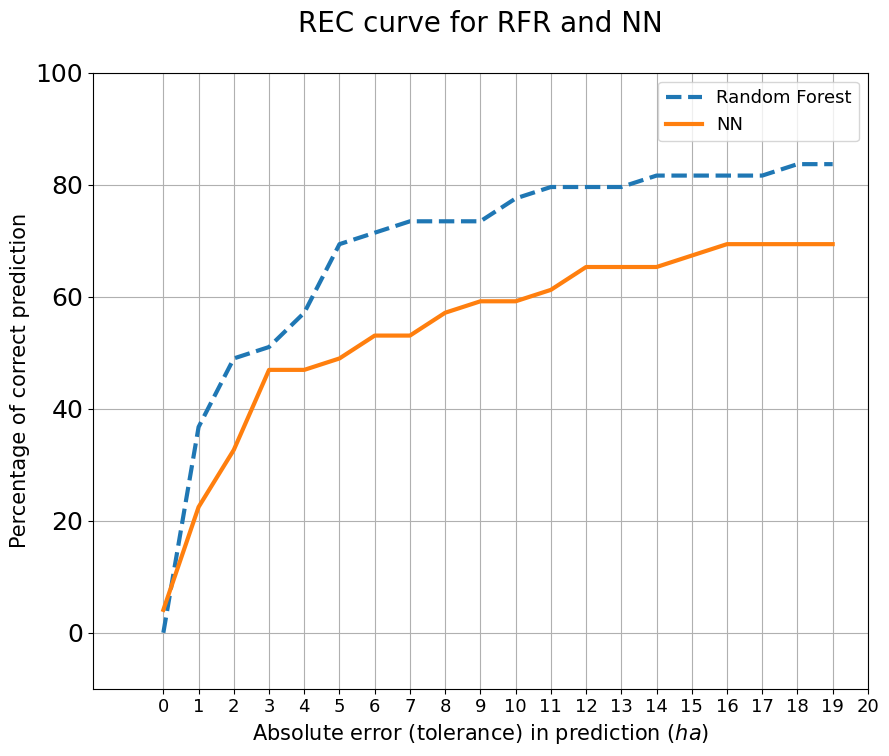

In [162]:
### Relative performance of random forest and nn
plt.figure(figsize=(10,8))    #plotting figure with size 10,8
plt.title("REC curve for RFR and NN\n",fontsize=20)  #title to the rec curve for rfr and nn
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)",fontsize=15)   #Plotting x label as absolute error(tolerance)in prediction
plt.ylabel("Percentage of correct prediction",fontsize=15)   #Plotting y label as percentage of correct prediction
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=13)
plt.ylim(-10,100)   #assigning a y limit
plt.xlim(-2,tol_max)   #assigning a x limit
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)  #plotting as a grid
plt.plot(range(tol_max),rec_RF,'--',lw=3)
plt.plot(range(tol_max),rec_NN,'-',lw=3)
plt.legend(['Random Forest','NN'],fontsize=13)   #Plotting rfr and nn

### **LINEAR REGRESSION**

Linear Regression is a direct way to deal with displaying the connection between a scalar reaction (or dependent variable) and at least one illustrative factors (or independent factors).


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming X is your original data with NaN values

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # or 'median', etc.

# Fit the imputer on your data and transform it
X_imputed = imputer.fit_transform(X)

# Fit the linear regression model on the imputed data
lm = LinearRegression()
lm.fit(X_imputed, y)

# Now, use the imputed data for prediction as well
y_pred = lm.predict(X_imputed)  ### Use X_imputed for prediction
y_pred

In [165]:
## Print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

-1.6397130767913475
[-0.07729838  0.05779554  0.06624152  0.0092643   0.00160895  0.07332958
 -0.00137821 -0.01742212  0.00820746 -0.01589358 -0.03332779 -0.01672932]


In [166]:
(1.74449208e-02 * 54.29) + (-0.05086798058566372)  ##y = mx+c
#m value--> coefficient(1.74449208e-02)
#c value--> intercept(-0.05086798058566372)

0.8962167696463363

In [168]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming X is your original data with NaN values

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # or 'median', etc.

# Fit the imputer on your data and transform it
X_imputed = imputer.fit_transform(X)

# Fit the linear regression model on the imputed data
lm = LinearRegression()
lm.fit(X_imputed, y)

# Now, use the imputed data for prediction as well
y_pred = lm.predict(X_imputed)  ### Use X_imputed for prediction
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 12']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([0.27817144, 0.2221067 , 1.20663019, 0.5680738 , 0.32203366,
       0.61992566, 0.60034695, 0.62147163, 0.34683359, 0.50699414,
       0.5341433 , 0.3828078 , 0.78659418, 0.56749653, 0.60308489,
       0.71963211, 0.90430375, 0.54449299, 0.3265034 , 0.94415124,
       0.50643503, 0.68558546, 0.64796294, 0.79757568, 0.7202891 ,
       0.69529532, 0.56979936, 0.45732668, 0.59492693, 0.55078919,
       0.38512872, 0.32526892, 0.63317108, 0.60740037, 0.50837422,
       0.35038655, 0.71576629, 0.6412181 , 0.43280662, 0.75864166,
       0.83716498, 0.95441675, 1.16796086, 0.7924009 , 0.65136095,
       0.52235988, 0.58037901, 0.75133933, 0.93846697, 1.02390013,
       0.87473867, 1.00418582, 0.835128  , 1.06938789, 1.12661659,
       1.02667929, 0.96552149, 1.18870983, 1.42687419, 1.49141326,
       1.42165346, 0.75494039, 0.94417251, 1.0345729 , 1.02251373,
       0.94444524, 0.78443639, 0.76157818, 0.8288611 , 1.01236087,
       0.97633331, 1.01501738, 1.03167181, 1.16800033, 0.94698

In [169]:
y==y_pred   # Compare the actual with the predicted values

,Log-area
0,False
1,False
2,False
3,False
4,False
...,...
117,False
118,False
119,False
120,False


In [170]:
## r2_value--> to check the model performance
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.3506023227114259

In [171]:
from sklearn.metrics import mean_squared_error as mse   #Importing mean_squared_error as mse from sklearn.metrics
from sklearn.metrics import mean_absolute_error as mae  #Importing mean_absolute_error as mae from sklearn.metrics
print("mse=", mse(y,y_pred))  #Printing mean_squared_error as 'mse='
print("mae=", mae(y,y_pred))  #Printing mean_absolute_error as 'mae='

mse= 0.25466126695616104
mae= 0.3401963232803821
